In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
df=pd.read_csv("/content/crime_data.csv")

In [25]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


# **EDA**

In [27]:
df.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [28]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df[['Murder', 'Assault', 'UrbanPop', 'Rape']]=sc.fit_transform(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])

In [30]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,1.255179,0.790787,-0.526195,-0.003451
1,Alaska,0.513019,1.118060,-1.224067,2.509424
2,Arizona,0.072361,1.493817,1.009122,1.053466
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794
4,California,0.281093,1.275635,1.776781,2.088814


# ***HIERARCHICAL CLUSTERING***

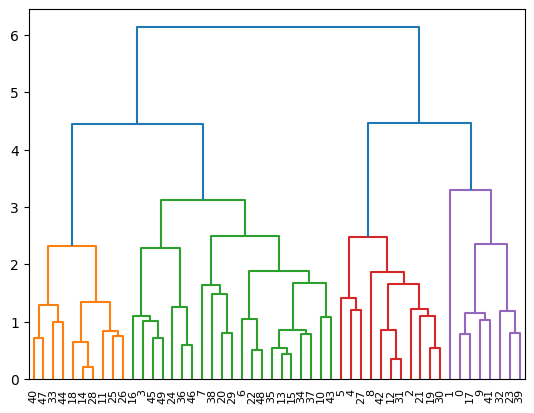

In [31]:
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(df.iloc[:,1:],method='complete'))
plt.show()

In [32]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='complete')

In [33]:
hc.fit(df.iloc[:,1:])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=8)

In [34]:
yhc=hc.fit_predict(df.iloc[:,1:])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [35]:
yhc

array([0, 4, 3, 2, 7, 7, 5, 6, 3, 0, 5, 1, 3, 5, 1, 5, 2, 0, 1, 3, 6, 3,
       5, 0, 2, 1, 1, 7, 1, 6, 3, 3, 0, 1, 5, 5, 2, 5, 6, 0, 1, 0, 3, 5,
       1, 2, 2, 1, 5, 2])

In [37]:
df_ori=df.copy()

In [38]:
df_k=df.copy()

In [39]:
df_b=df.copy()

In [40]:
df["clusters"]=yhc

In [41]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,1.255179,0.790787,-0.526195,-0.003451,0
1,Alaska,0.513019,1.118060,-1.224067,2.509424,4
2,Arizona,0.072361,1.493817,1.009122,1.053466,3
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794,2
4,California,0.281093,1.275635,1.776781,2.088814,7
5,Colorado,0.025976,0.402909,0.869548,1.883901,7
6,Connecticut,-1.040880,-0.736484,0.799761,-1.092723,5
7,Delaware,-0.437875,0.815030,0.450825,-0.585834,6
8,Florida,1.765415,1.990786,1.009122,1.150530,3
9,Georgia,2.229265,0.487757,-0.386621,0.492653,0


In [42]:
df_h=df.sort_values("clusters")

In [44]:
df_h

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,1.255179,0.790787,-0.526195,-0.003451,0
17,Louisiana,1.765415,0.948363,0.032102,0.104398,0
32,North Carolina,1.208794,2.015028,-1.433428,-0.553480,0
39,South Carolina,1.533490,1.311999,-1.224067,0.136752,0
41,Tennessee,1.255179,0.208970,-0.456408,0.611287,0
9,Georgia,2.229265,0.487757,-0.386621,0.492653,0
23,Mississippi,1.927762,1.069575,-1.503215,-0.445631,0
40,South Dakota,-0.924918,-1.027393,-1.433428,-0.909380,1
18,Maine,-1.319191,-1.063757,-1.014705,-1.448624,1
33,North Dakota,-1.620693,-1.524362,-1.503215,-1.502548,1


In [45]:
df_h[["Unnamed: 0","clusters"]]

,Unnamed: 0,clusters
0,Alabama,0
17,Louisiana,0
32,North Carolina,0
39,South Carolina,0
41,Tennessee,0
9,Georgia,0
23,Mississippi,0
40,South Dakota,1
18,Maine,1
33,North Dakota,1


# **K-MEANS CLUSTERING**

In [46]:
df_k.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,1.255179,0.790787,-0.526195,-0.003451
1,Alaska,0.513019,1.118060,-1.224067,2.509424
2,Arizona,0.072361,1.493817,1.009122,1.053466
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794
4,California,0.281093,1.275635,1.776781,2.088814


In [47]:
from sklearn.cluster import KMeans

In [51]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df_k.iloc[:,1:])
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [52]:
wcss

[200.00000000000003,
 104.96163315756871,
 80.0657554011071,
 57.55425863091105,
 50.07656289493945,
 44.28763884786578,
 39.89406498012444,
 36.00065274455797,
 32.42487239166407,
 29.967013132082734]

<Axes: >

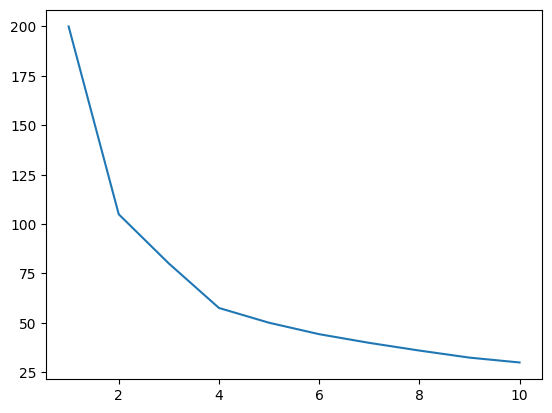

In [53]:
sns.lineplot(x=range(1,11),y=wcss)

In [54]:
from sklearn.metrics import silhouette_score

In [55]:
kmeans=KMeans(n_clusters=4)
predict=kmeans.fit_predict(df_k.iloc[:,1:])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
predict

array([0, 1, 1, 0, 1, 1, 3, 3, 1, 0, 3, 2, 1, 3, 2, 3, 2, 0, 2, 1, 3, 1,
       2, 0, 1, 2, 2, 1, 2, 3, 1, 1, 0, 2, 3, 3, 3, 3, 3, 0, 2, 0, 1, 3,
       2, 3, 3, 2, 2, 3], dtype=int32)

In [57]:
df_ori_k=df_k.copy()

In [58]:
df_ori_k['clusterid']=kmeans.labels_

In [59]:
df_ori_k

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,1.255179,0.790787,-0.526195,-0.003451,0
1,Alaska,0.513019,1.118060,-1.224067,2.509424,1
2,Arizona,0.072361,1.493817,1.009122,1.053466,1
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794,0
4,California,0.281093,1.275635,1.776781,2.088814,1
5,Colorado,0.025976,0.402909,0.869548,1.883901,1
6,Connecticut,-1.040880,-0.736484,0.799761,-1.092723,3
7,Delaware,-0.437875,0.815030,0.450825,-0.585834,3
8,Florida,1.765415,1.990786,1.009122,1.150530,1
9,Georgia,2.229265,0.487757,-0.386621,0.492653,0


In [60]:
kmeans.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024]])

In [61]:
df_k1=df_ori_k.groupby("clusterid").mean().reset_index()
df_k1

<ipython-input-61-9e1f5e63defe>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_k1=df_ori_k.groupby("clusterid").mean().reset_index()


,clusterid,Murder,Assault,UrbanPop,Rape
0,0,1.426224,0.883211,-0.822791,0.019467
1,1,0.702127,1.049994,0.729974,1.289904
2,2,-0.971303,-1.117836,-0.939550,-0.976578
3,3,-0.494407,-0.386484,0.581676,-0.264310


In [62]:
df_ori_k["Unnamed: 0"][df_ori_k["clusterid"]==0]

0            Alabama
3           Arkansas
9            Georgia
17         Louisiana
23       Mississippi
32    North Carolina
39    South Carolina
41         Tennessee
Name: Unnamed: 0, dtype: object

In [63]:
df_ori_k["Unnamed: 0"][df_ori_k["clusterid"]==1]

1         Alaska
2        Arizona
4     California
5       Colorado
8        Florida
12      Illinois
19      Maryland
21      Michigan
24      Missouri
27        Nevada
30    New Mexico
31      New York
42         Texas
Name: Unnamed: 0, dtype: object

In [64]:
df_ori_k["Unnamed: 0"][df_ori_k["clusterid"]==2]

11            Idaho
14             Iowa
16         Kentucky
18            Maine
22        Minnesota
25          Montana
26         Nebraska
28    New Hampshire
33     North Dakota
40     South Dakota
44          Vermont
47    West Virginia
48        Wisconsin
Name: Unnamed: 0, dtype: object

In [68]:
label_0=df_k[predict==0]
label_1=df_k[predict==1]
label_2=df_k[predict==2]
label_3=df_k[predict==3]

In [67]:
label_0

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,1.255179,0.790787,-0.526195,-0.003451
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794
9,Georgia,2.229265,0.487757,-0.386621,0.492653
17,Louisiana,1.765415,0.948363,0.032102,0.104398
23,Mississippi,1.927762,1.069575,-1.503215,-0.445631
32,North Carolina,1.208794,2.015028,-1.433428,-0.553480
39,South Carolina,1.533490,1.311999,-1.224067,0.136752
41,Tennessee,1.255179,0.208970,-0.456408,0.611287


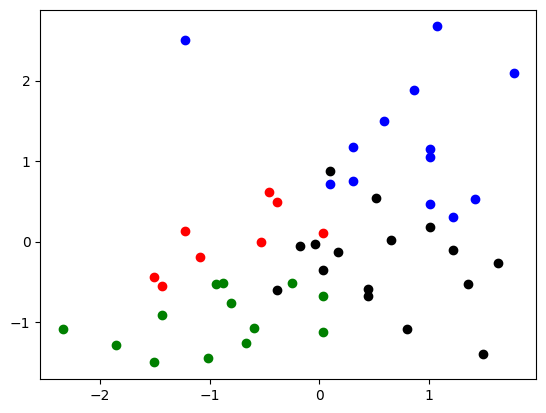

In [73]:
cols=df_k.iloc[:,1:].columns
plt.scatter(label_0[cols[2]],label_0[cols[3]], color = 'red')
plt.scatter(label_1[cols[2]],label_1[cols[3]], color = 'blue')
plt.scatter(label_2[cols[2]],label_2[cols[3]], color = 'green')
plt.scatter(label_3[cols[2]],label_3[cols[3]], color = 'black')
plt.show()

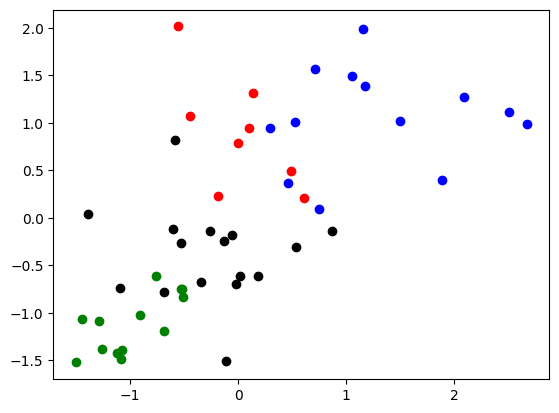

In [75]:
plt.scatter(label_0[cols[3]],label_0[cols[1]], color = 'red')
plt.scatter(label_1[cols[3]],label_1[cols[1]], color = 'blue')
plt.scatter(label_2[cols[3]],label_2[cols[1]], color = 'green')
plt.scatter(label_3[cols[3]],label_3[cols[1]], color = 'black')
plt.show()

# **DBSCAN CLUSTERING**

In [76]:
df_b.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,1.255179,0.790787,-0.526195,-0.003451
1,Alaska,0.513019,1.118060,-1.224067,2.509424
2,Arizona,0.072361,1.493817,1.009122,1.053466
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794
4,California,0.281093,1.275635,1.776781,2.088814


In [79]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=8)
nbrs=nn.fit(df_b.iloc[:,1:])
distances,indeces=nbrs.kneighbors(df_b.iloc[:,1:])

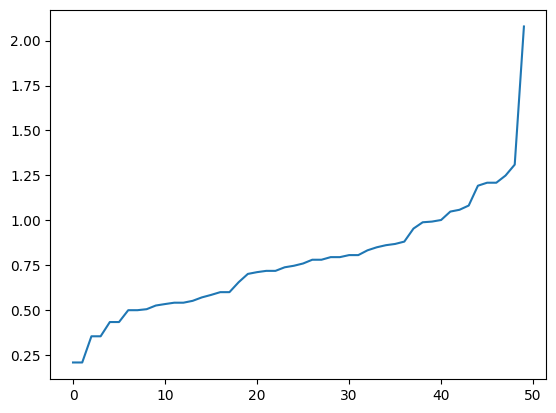

In [80]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)

In [81]:
distances

array([0.2079438 , 0.2079438 , 0.35377437, 0.35377437, 0.43312429,
       0.43312429, 0.49909939, 0.49909939, 0.50466926, 0.52515083,
       0.53326883, 0.54082482, 0.54082482, 0.55122406, 0.57035779,
       0.58411812, 0.59956023, 0.59956023, 0.65497312, 0.70111326,
       0.71097658, 0.71809843, 0.71809843, 0.73797792, 0.74649625,
       0.75913104, 0.78006247, 0.78006247, 0.79455301, 0.79455301,
       0.80586349, 0.80586349, 0.83250223, 0.84928467, 0.8610239 ,
       0.86797806, 0.88100359, 0.95367898, 0.98866758, 0.99246041,
       1.0013278 , 1.0482199 , 1.0582674 , 1.08184506, 1.19227586,
       1.20897691, 1.20897691, 1.24886253, 1.30974334, 2.07898369])

In [84]:
dbscan=DBSCAN(eps=0.8, min_samples=5)
dbscan.fit_predict(df_b.iloc[:,1:])

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  1,  0, -1,
       -1,  1, -1, -1, -1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1, -1,  1,
        0,  0, -1,  0, -1, -1,  1, -1, -1, -1, -1,  0, -1, -1,  1,  0])

In [85]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  1,  0, -1,
       -1,  1, -1, -1, -1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1, -1,  1,
        0,  0, -1,  0, -1, -1,  1, -1, -1, -1, -1,  0, -1, -1,  1,  0])

In [87]:
df_b["cluster"]=dbscan.labels_
df_b.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,1.255179,0.790787,-0.526195,-0.003451,-1
1,Alaska,0.513019,1.118060,-1.224067,2.509424,-1
2,Arizona,0.072361,1.493817,1.009122,1.053466,-1
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794,-1
4,California,0.281093,1.275635,1.776781,2.088814,-1


In [88]:
df_b[df_b['cluster']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
14,Iowa,-1.295998,-1.391029,-0.595982,-1.071153,1
18,Maine,-1.319191,-1.063757,-1.014705,-1.448624,1
28,New Hampshire,-1.319191,-1.378908,-0.665769,-1.265281,1
33,North Dakota,-1.620693,-1.524362,-1.503215,-1.502548,1
40,South Dakota,-0.924918,-1.027393,-1.433428,-0.909380,1
48,Wisconsin,-1.203228,-1.427393,0.032102,-1.125078,1


# **DBSCAN Accuracy**

In [91]:
silhouette_score(df_b.iloc[:,1:],df_b["cluster"])

0.1644005088159903

# **K_Means Accuracy**

In [92]:
silhouette_score(df_ori_k.iloc[:,1:],df_ori_k["clusterid"])

0.4212647750956961

# **Hierarchy Clustering Accuracy**

In [94]:
silhouette_score(df.iloc[:,1:],df["clusters"])

0.4551766628602316